# Project on Rainfall Machine Learning Model

# Description

**Objective or Aim is to build a machine learning model capable of predicting the possibility of rainfall prior to the dataset historical or dataset of a particular area.**

In [1]:
#import required libraries
import pandas as pd #for data processing and reading
import numpy as np #for linear algebra processing
import matplotlib.pyplot as plt #For visualization
import seaborn as sns #for visualization

In [2]:
#loading the csv file
df=pd.read_csv('ausraindata.csv')

In [3]:
#Displaying data, using df.head() or print(df[0:5])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
#Rain Tomorrow is our Target Variable or Predicted variable
#we have Preictor variable

In [5]:
#lets know the size of the data
print('The size of the dataframe is:', df.shape)

The size of the dataframe is: (142193, 24)


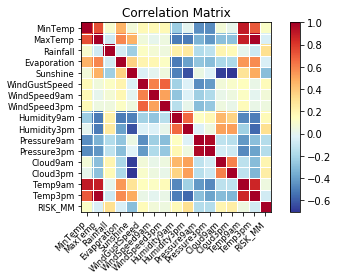

In [6]:
#let's visualize to see how the different features correlate
corr = df.corr(method='pearson')
corr
import statsmodels.api as sm

sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

# DATA PREPROCESSING

In [7]:
#Dealing with Missing Values
#droping
df.drop(['Date'],axis=1,inplace= True) 

In [8]:
df['Evaporation'].fillna(0,inplace=True)
df['Sunshine'].fillna(0,inplace=True)
df['Rainfall'].fillna(0,inplace=True)
df['WindGustSpeed'].fillna(31,inplace=True)
df['Cloud3pm'].fillna(4,inplace=True)
df['Cloud9am'].fillna(4,inplace=True)
df['WindDir9am'].fillna('N',inplace=True)
df['WindGustDir'].fillna('W',inplace=True)
df['MaxTemp'].fillna(28,inplace=True)
df['MinTemp'].fillna(16,inplace=True)
df['WindDir3pm'].fillna('SE',inplace=True)
df['WindSpeed9am'].fillna(13,inplace=True)
df['WindSpeed3pm'].fillna(19,inplace=True)
df['Humidity9am'].fillna(70,inplace=True)
df['Humidity3pm'].fillna(32,inplace=True)
df['Pressure9am'].fillna(1017,inplace=True)
df['Pressure3pm'].fillna(1015,inplace=True)
df['Temp9am'].fillna(16,inplace=True)
df['Temp3pm'].fillna(21,inplace=True)

In [9]:
#LET'S DEAL WITH CATEGORICAL DATA
#changing yes/no to 1/0 for RainToday and RainTomorrow. 
df['RainToday'].replace({'No':0,'Yes':1},inplace=True)
df['RainTomorrow'].replace({'No':0,'Yes':1},inplace=True)

In [10]:
#to remove any null values
df=df.dropna(how='any')

In [11]:
#droping
df.drop(['Location'],axis=1,inplace= True) 

In [12]:
print(df.shape)

(140787, 22)


In [13]:
#let's convert unique value columns to int, i.e character values that are not consistent

categorical_columns=['WindGustDir','WindDir9am','WindDir3pm']
for col in categorical_columns:
    print(np.unique(df[col]))

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


In [14]:
#NORMALIZING OUR DATA SET for all the values to be in similar range, like 

df=pd.get_dummies(df, columns=categorical_columns)
print(df.iloc[4:9])

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
4     17.5     32.3       1.0          0.0       0.0           41.0   
5     14.6     29.7       0.2          0.0       0.0           56.0   
6     14.3     25.0       0.0          0.0       0.0           50.0   
7      7.7     26.7       0.0          0.0       0.0           35.0   
8      9.7     31.9       0.0          0.0       0.0           80.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  WindDir3pm_NNW  \
4           7.0          20.0         82.0         33.0  ...               0   
5          19.0          24.0         55.0         23.0  ...               0   
6          20.0          24.0         49.0         19.0  ...               0   
7           6.0          17.0         48.0         19.0  ...               0   
8           7.0          28.0         42.0          9.0  ...               0   

   WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  \
4          

In [15]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
scaler.fit(df)
df=pd.DataFrame(scaler.transform(df),index=df.index,columns=df.columns)

In [16]:
#FEATURE SELECTION OR IMPORTANCE

In [17]:
X = df.iloc[:,:-1]         #Features
y = df.iloc[:,-1]          #Target variable

In [18]:
#for data spliting
from sklearn.model_selection import train_test_split
#for accuracy check
from sklearn.metrics import accuracy_score
#for time measurement check
#import time
#t0=time.time()

In [19]:
#Data splicing, so here 75% of the data is used as the training data while 25% of the data is used as testing data.
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [20]:
#DATA MODELING..USING FOR MULTIPLE CLASSIFICATION

#confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, Y_pred)
cnf_matrix

The accuracy of the model is $100\%$

# USING SUPPORT VECTOR MACHINE

In [21]:
from sklearn import svm
rainfall=svm.SVC(kernel='linear')

rainfall.fit(X_train,y_train)

Y_pred = rainfall.predict(X_test) #here you evaluate the model by using testing data set

score=accuracy_score(y_test, Y_pred)
print('Accuracy Using Support Vector Machine Algorithm is:', score*100)
#print('Time Taken Using SVM is:', time.time()-t0)

Accuracy Using Support Vector Machine Algorithm is: 100.0


In [22]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, Y_pred)
cnf_matrix

array([[32840,     0],
       [    0,  2357]], dtype=int64)

The accuracy of the model is $100\%$

In [23]:
#For MODEL DEPLOYMENT
import pickle
pickle_out = open("rainfall.pkl","wb")
pickle.dump(rainfall,pickle_out)
pickle_out.close()

In [25]:
X_test.shape

(35197, 66)